# XOR Exercise
| x1      | x2 | Label |
| ----------- | ----------- | ----------- |
| 0      | 0       | 0       |
| 0   | 1        |1         |
| 1      | 0       | 1       |
| 1   | 1        |0         |

<br><br>
This exercise was inspired by the following article:<br>[Neural Network Implementation for XOR Gate Using Numpy](https://medium.com/analytics-vidhya/neural-network-implementation-for-xor-gate-using-numpy-59eca77b54cc)

## Import Libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

## Create Dataset

In [14]:
X=np.vstack(([0,0],[0,1],[1,0],[1,1]))
t=np.array([0,1,1,0]).reshape(-1,1)
print(f'Train Features  : \n{X}\n\nLabels: \n{t}')

Train Features  : 
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Labels: 
[[0]
 [1]
 [1]
 [0]]


## Activation Function
Sigmoid: 

<img src="https://miro.medium.com/max/884/1*h2mKSbkSqRmYi9OhHyWpKA@2x.png" alt="Sigmoid" width="250" >

Sigmoid derivative:

<img src="https://miro.medium.com/max/1058/1*SLri0VBaH3IeD8KOMbA3kQ.png" alt="Sigmoid derivative" width="400" >

In [15]:
def sigmoid(x):
  return (1/(1+np.exp(-x)))

## Loss Function

<img src="https://miro.medium.com/max/1198/1*BtVajQNj29LkVySEWR_4ww.png" alt="mean squared error" width="500" >


In [16]:
def mean_squared_error(y, t):
  n = y.shape[0]
  return (1/n*np.sum((y-t)**2))

## Hyper Parameters

In [17]:
alpha=0.01
epochs = 3000
loss_list, epochs_list=[],[]

## Weights Initialization

In [18]:
W1=np.random.rand(2,16)
b1 = np.zeros((1, 16))
W2=np.random.rand(16,1)
b2 = np.zeros((1, 1))
print(W1.shape,'\n',W2.shape)

(2, 16) 
 (16, 1)


## Train NN

<u>**Feed Forward Equations**</u>:
<br><br>
<img src="https://miro.medium.com/max/884/1*YB9_AfIT0uI1GmlYmMVYOw.png" alt="Feed Forward Equations" width="400" >
<br><br>
<u>**Backpropagation Equations**</u>

**W2**:

<br>
<img src="https://miro.medium.com/max/1184/1*rMeNhANWQ0KzuuK2rfJg4g.png" alt="W2 - Backpropagation" width="500" >

**W1**:

<br>


<img src="https://miro.medium.com/max/1400/1*i5QGDK5urJJLxVaJHDH3Fw.png" alt="W1 - Backpropagation" width="600" >



In [19]:
for ep in range(epochs):

  # TODO :  Forward propagation  
  z=sigmoid(np.dot(X,W1)+ b1) 
  y=sigmoid(np.dot(z,W2)+ b2) 

  # TODO: Compute loss
  loss=mean_squared_error(y, t)

  # TODO: Back propagation
  djdy = 2*(y-t)  # dj/dy | (4,1)
  dydW2 = djdy * (y*(1-y)) # sig'(x) = sig(x)*(1-sig(x)) | (4,1)
  dW2 = np.dot(z.T, dydW2) # dj/dW2 | (16,1)

  db2 = djdy

  dydz = np.dot(dydW2, W2.T) * (z*(1-z)) # dy/dz | sig'(x) = sig(x)*(1-sig(x)) | (4, 16)
  dW1 = np.dot(X.T,dydz) # dj/dW1 | (2, 16)

  db1 = dydz

  # TODO: Update weights
  W2 = W2-alpha*dW2
  b2 = b2-alpha*db2
  W1 = W1-alpha*dW1
  b1 = b1-alpha*db1


  if not ep % 200:
    calc_accuracy = 0
    for i in range(y.shape[0]): 
      if (y[i][0] > 0.5) == t[i][0]: calc_accuracy += 1
    calc_accuracy /= y.shape[0]    
    print(f'epoch: {ep}, loss: {loss}, Accuracy: {calc_accuracy}')

  loss_list.append(loss)
  epochs_list.append(ep)

epoch: 0, loss: 0.49301784398027537, Accuracy: 0.5
epoch: 200, loss: 0.05090766268054853, Accuracy: 1.0
epoch: 400, loss: 0.00964085017765693, Accuracy: 1.0
epoch: 600, loss: 0.005172447568860568, Accuracy: 1.0
epoch: 800, loss: 0.0032011283690287903, Accuracy: 1.0
epoch: 1000, loss: 0.0021655621908215172, Accuracy: 1.0
epoch: 1200, loss: 0.0015581018696765496, Accuracy: 1.0
epoch: 1400, loss: 0.0011727477882171734, Accuracy: 1.0
epoch: 1600, loss: 0.0009135740642404928, Accuracy: 1.0
epoch: 1800, loss: 0.0007311893701793867, Accuracy: 1.0
epoch: 2000, loss: 0.0005981258552236751, Accuracy: 1.0
epoch: 2200, loss: 0.0004981470545862875, Accuracy: 1.0
epoch: 2400, loss: 0.00042116828513814094, Accuracy: 1.0
epoch: 2600, loss: 0.0003606636737605043, Accuracy: 1.0
epoch: 2800, loss: 0.0003122620092962095, Accuracy: 1.0


## Loss Visualization

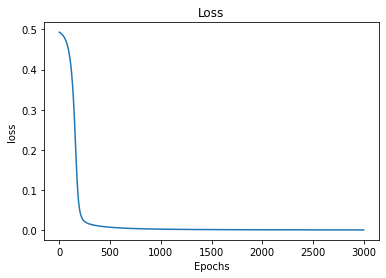

In [20]:
plt.title('Loss')
plt.xlabel("Epochs")
plt.ylabel("loss")

plt.plot(epochs_list,loss_list)
plt.show()

## Test model performance
We will implement the "Forward" with the trained weights.

In [21]:
X_test=np.vstack(([0,0],[0,1],[1,0],[1,1]))
y_test=np.array([0,1,1,0])

# TODO :  Forward propagation  
z_test = sigmoid(np.dot(X_test,W1)+ b1)
y_pred = sigmoid(np.dot(z_test,W2)+ b2)
print(y_pred.T)

[[0.01647251 0.98360606 0.98349103 0.01670749]]


### Check your predictions against the test's labels

In [22]:
predictions = np.zeros((1,y_test.shape[0]))

for i in range(y_test.shape[0]):
  if (y_pred[i][0] > 0.5): 
    predictions[0][i] = 1
print(f'Our predictions{predictions}\nLabls:{y_test}')

Our predictions[[0. 1. 1. 0.]]
Labls:[0 1 1 0]


### Show Classification Evaluation Metrics

In [23]:
cm = confusion_matrix(predictions.T, y_test.T)
print('Accuracy Score : ', accuracy_score(predictions.T, y_test.T))
print('Confusion Matrix : \n', cm)

Accuracy Score :  1.0
Confusion Matrix : 
 [[2 0]
 [0 2]]


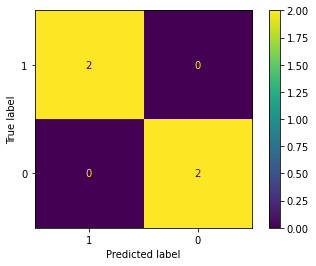

In [24]:
ConfusionMatrixDisplay(cm, display_labels=["1", "0"]).plot()